### Preamble

In [2]:
type Not[P] = P => Nothing
type <=>[P, Q] = (P => Q, Q => P)

defined type Not
defined type <=>

In [3]:
trait ExcludedMiddle: 
    def apply[P]: Either[P, Not[P]]

defined trait ExcludedMiddle

In [4]:
trait DoubleNegation:
    def apply[P]: Not[Not[P]] => P

defined trait DoubleNegation

# Topic 4: The Curry-Howard correspondence

## Exercise 1

Prove the following theorems of intuitionistic propositional logic by implementing the corresponding
functional programs:

$\vdash p \vee (q \wedge r) \leftrightarrow (p \vee q) \wedge (p \vee r)$


In [5]:
def proof[P, Q, R]: Either[P, (Q, R)] <=> (Either[P, Q], Either[P, R]) = 
    ??? 

defined function proof

In [7]:
def proof[P, Q, R]: (Either[P, (Q, R)] => (Either[P, Q], Either[P, R]),
                     (Either[P, Q], Either[P, R]) => Either[P, (Q, R)]) =  
    (??? : Either[P, (Q, R)] => (Either[P, Q], Either[P, R]), 
     ??? : (Either[P, Q], Either[P, R]) => Either[P, (Q, R)])

defined function proof

Prove the following theorems of intuitionistic propositional logic by implementing the corresponding
functional programs:

$\vdash p \vee (q \wedge r) \rightarrow (p \vee q) \wedge (p \vee r)$


###### Solution

In [3]:
def proof[P, Q, R]: Either[P, (Q, R)] <=> (Either[P, Q], Either[P, R]) = 
    ({  case Left(p) => (Left(p), Left(p))
        case Right((q,r)) => (Right(q), Right(r)) },
     {  case (Left(p), _) => Left(p)
        case (_, Left(p)) => Left(p)
        case (Right(q), Right(r)) => Right((q,r))})

defined function proof

###### Your solution

In [ ]:
def proof[P, Q, R]: ? = 
    ??? 

$\vdash (q \vee r \rightarrow p) \leftrightarrow (q \rightarrow p) \wedge (r \rightarrow p)$

###### Solution

In [4]:
def proof[P, Q, R]: (Either[Q, R] => P) <=> (Q => P, R => P) = 
    (f => (q => f(Left(q)), r => f(Right(r))), 
     {case (f, g) => {
        case Left(q) => f(q)
        case Right(r) => g(r)
     }})

defined function proof

###### Your solution

$\vdash p \vee q \rightarrow \neg p \rightarrow q$ 

###### Solution

In [7]:
def proof[P, Q]: Either[P, Q] => (P => Nothing) => Q = 
    case Left(a: P) => f => f(a): Q
    case Right(b: Q) => _ => b : Q

defined function proof

###### Your solution

$\vdash p \vee q \rightarrow q \vee p$

###### Solution

In [8]:
def proof[P, Q]: Either[P, Q] => Either[Q, P] = 
    case Left(p) => Right(p)
    case Right(q) => Left(q)

defined function proof

###### Your solution

$\vdash (p \rightarrow \neg q) \rightarrow (p \rightarrow q) \rightarrow \neg p$

###### Solution

In [3]:
def proof[P, Q]: (P => Not[Q]) => (P => Q) => Not[P] = 
    f => pq => p => f(p)(pq(p))


defined function proof

###### Your solution

$\vdash \neg p \rightarrow p \rightarrow q$

###### Solution

In [ ]:
def proof[P, Q]: Not[P] => P => Q = 
    np => p => np(p)

###### Your solution

$\vdash \neg(p \rightarrow q) \rightarrow \neg q$

###### Solution

In [4]:
def proof[P, Q]: Not[P => Q] => Not[Q] = 
    npq => q => npq(_ => q)

defined function proof

###### Your solution

$\vdash \neg p \rightarrow \neg (p \wedge q)$

###### Solution

In [ ]:
def proof[P, Q]: Not[P] => Not[(P, Q)] = 
    np => pq => np(pq._1)

###### Your solution

$\vdash \neg (p \wedge q) \rightarrow p \rightarrow \neg q$

###### Solution

In [ ]:
def proof[P, Q]: Not[(P, Q)] => P => Not[Q] = 
    npq => p => q => npq((p,q))

###### Your solution

$\vdash \neg (p \wedge \neg p)$

###### Solution

In [9]:
def proof[P]: Not[(P, Not[P])] = 
    case (p, np) => np(p)

defined function proof

###### Your solution

$\vdash \neg (p \vee q) \rightarrow \neg p \wedge \neg q$

###### Solution

In [ ]:
def proof[P, Q]: Not[Either[P, Q]] => (Not[P], Not[Q]) = 
    n => (p => n(Left(p)), q => n(Right(q)))

###### Your solution

$\vdash \neg p \wedge \neg q \rightarrow \neg (p \vee q)$

###### Solution

In [12]:
def proof[P, Q]: (Not[P], Not[Q]) => Not[Either[P, Q]] = 
    (np, nq) =>
        case Left(p) => np(p)
        case Right(q) => nq(q)

defined function proof

###### Your solution

## Exercise 2

Prove the following theorem of classical logic assuming that the double negation law holds for proposition `P`:

$ \vdash (\neg p \rightarrow p) \rightarrow p$

###### Solution

In [19]:
def proof[P](DN: DoubleNegation): (Not[P] => P) => P =
    f => DN[P]((n: Not[P]) => n(f(n)))

defined function proof

###### Your solution

In [31]:
def proof[P](dn: DoubleNegation): ((P => Nothing) => P) => P =
    d => dn.apply[P](??? : Not[Not[P]])

defined function proof

In [32]:
def proof[P](dn: DoubleNegation): ((P => Nothing) => P) => P =
    d => dn[P](??? : Not[Not[P]])

defined function proof

In [34]:
def proof[P](dn: DoubleNegation): ((P => Nothing) => P) => P =
    f => dn[P](np => np(f(np)))

defined function proof

In [35]:
def proof[P](dnP: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    ??? : ((Not[P] => P) => P)

defined function proof

In [18]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        ??? : P

defined function proof

In [19]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn(??? : Not[Not[P]])

defined function proof

In [20]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn(??? : Not[P] => Nothing)

defined function proof

In [21]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn((np : Not[P]) => ??? : Nothing)

defined function proof

In [22]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn((np : P => Nothing) => ??? : Nothing)

defined function proof

In [23]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn((np : P => Nothing) => np(??? : P))

defined function proof

In [24]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn((np : P => Nothing) => np(f(??? : Not[P])))

defined function proof

In [29]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    (f: Not[P] => P) => 
        dn((np : P => Nothing) => np(f(np)))

defined function proof

In [27]:
def proof[P](dn: Not[Not[P]] => P): ((P => Nothing) => P) => P =
    f => dn(np => np(f(np)))

defined function proof

In [9]:
def proof[P]: ((P => Nothing) => P) => P =
    ??? 

defined function proof

In [11]:
def proof[P](/* ... */): (Not[P] => P) => P =
    ??? : ((Not[P] => P) => P)

defined function proof

In [12]:
def proof[P](/* ... */): (Not[P] => P) => P =
    (f: Not[P] => P) => 
        ??? : P

defined function proof

In [13]:
def proof[P](/* ... */): (Not[P] => P) => P =
    (f: Not[P] => P) => 
        f(??? : Not[P]) : P

defined function proof

In [14]:
def proof[P](/* ... */): (Not[P] => P) => P =
    (f: Not[P] => P) => 
        f(??? : P => Nothing) : P

defined function proof

In [15]:
def proof[P](/* ... */): (Not[P] => P) => P =
    (f: Not[P] => P) => 
        f( (p: P) => ??? : Nothing) : P

defined function proof

## Exercise 3

Prove the following theorems of intuitionistic propositional logic using functional programs: 

$ \vdash (p \rightarrow q \rightarrow r) \rightarrow (p \rightarrow q) \rightarrow p \rightarrow r$

###### Solution

In [ ]:
def term[P, Q, R]: (P => (Q => R)) => (P => Q) => (P => R) = 
    (p1: P => Q => R) => 
        (p2: P => Q) => 
            (p: P) => p1(p : P)(p2(p) : Q) : R

###### Your solution

In [56]:
def proof[P, Q, R]: (P => Q => R) => (P => Q) => P => R = 
    ??? : ((P => Q => R) => (P => Q) => P => R)

defined function proof

In [57]:
def proof[P, Q, R]: (P => Q => R) => (P => Q) => P => R = 
    (f: P => Q => R) => 
        ??? : ((P => Q) => P => R)

defined function proof

In [58]:
def proof[P, Q, R]: (P => Q => R) => (P => Q) => P => R = 
    (f: P => Q => R) => 
        (g: P => Q) => 
            ??? : (P => R)

defined function proof

In [59]:
def proof[P, Q, R]: (P => Q => R) => (P => Q) => P => R = 
    (f: P => Q => R) => 
        (g: P => Q) => 
            (p: P) => 
                ??? : R

defined function proof

$\vdash \neg \neg \neg p \leftrightarrow \neg p$

###### Solution

In [4]:
def proof[P]: (Not[Not[Not[P]]] => Not[P], Not[P] => Not[Not[Not[P]]]) = 
    (nnnp => p => nnnp(_(p)),
     np => nnp => nnp(np))

defined function proof

###### Your solution

## Exercise 4


Solve the following exercises (taken from a course on logic) using functional programming. 

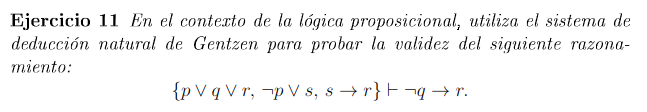

###### Solution

In [15]:
def proof[P, Q, R, S](
    p1: Either[P, Either[Q, R]], 
    p2: Either[Not[P], S], 
    p3: S => R): Not[Q] => R = 
    (nq: (Q => Nothing)) => 
        (p1, p2) match
            case (Left(p: P), Left(np: Not[P])) => 
                np(p) : R
            case (Right(Left(q: Q)), _) => 
                nq(q) : R
            case (Right(Right(r: R)), _) => 
                r : R
            case (_, Right(s: S)) => 
                p3(s) : R

defined function proof

###### Your solution

In [39]:
trait Clase: 
    type P

defined trait Clase

In [40]:
type F = (a: Clase) => a.P

defined type F

In [38]:
def proof[P, Q, R, S]:
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R) => Not[Q] => R = 
        ??? 

defined function proof

In [43]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        ??? : (Not[Q] => R) 

defined function proof

In [44]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Not[Q]) => 
            ??? : R

defined function proof

In [44]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            ??? : R

defined function proof

In [45]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            nq(??? : Q) : R

defined function proof

In [46]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            e1 match 
                case Left(Left(p: P)) => ??? : R
                case Left(Right(q: Q)) => ??? : R
                case Right(r: R) => ??? : R

defined function proof

In [46]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            e1 match 
                case Left(Left(p: P)) => ??? : R
                case Left(Right(q: Q)) => ??? : R
                case Right(r: R) => r : R

defined function proof

In [48]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            e1 match 
                case Left(Left(p: P)) => 
                    e2 match 
                        case Left(np: Not[P]) => ??? : R
                        case Right(s: S) => ??? : R
                case Left(Right(q: Q)) => nq(q) : R
                case Right(r: R) => r : R

defined function proof

In [49]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            e1 match 
                case Left(Left(p: P)) => 
                    e2 match 
                        case Left(np: Not[P]) => np(p) : R
                        case Right(s: S) => ??? : R
                case Left(Right(q: Q)) => nq(q) : R
                case Right(r: R) => r : R

defined function proof

In [50]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            e1 match 
                case Left(Left(p: P)) => 
                    e2 match 
                        case Left(np: Not[P]) => np(p) : R
                        case Right(s: S) => e3(s) : R
                case Left(Right(q: Q)) => nq(q) : R
                case Right(r: R) => r : R

defined function proof

In [52]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            (e1, e2) match 
                case (Left(Left(p: P)), e2) => 
                    e2 match 
                        case Left(np: Not[P]) => np(p) : R
                        case Right(s: S) => e3(s) : R
                case (Left(Right(q: Q)), _) => nq(q) : R
                case (Right(r: R), _) => r : R

defined function proof

In [53]:
def proof[P, Q, R, S]
    (e1: Either[Either[P, Q], R], 
     e2: Either[Not[P], S], 
     e3: S => R):
         Not[Q] => R = 
        (nq: Q => Nothing) => 
            (e1, e2) match 
                case (Left(Left(p: P)), Left(np: Not[P])) => np(p) : R
                case (Left(Left(p: P)), Right(s: S)) => e3(s) : R
                case (Left(Right(q: Q)), _) => nq(q) : R
                case (Right(r: R), _) => r : R

defined function proof

In [55]:
def proof[P, Q, R, S]:
    (Either[Either[P, Q], R], 
     Either[Not[P], S], 
     S => R) => Not[Q] => R = 
        (e1, e2, e3) => (nq: Q => Nothing) => 
            (e1, e2) match 
                case (Left(Left(p: P)), Left(np: Not[P])) => np(p) : R
                case (Left(Left(p: P)), Right(s: S)) => e3(s) : R
                case (Left(Right(q: Q)), _) => nq(q) : R
                case (Right(r: R), _) => r : R

defined function proof

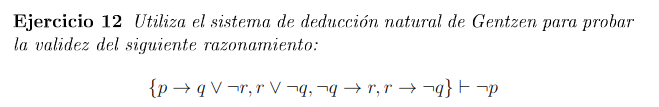

###### Solution

In [16]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R,
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        (p1(p), p2) match
            case (Left(q: Q), Left(r: R)) => 
                p4(r)(q) : Nothing
            case (Right(nr: Not[R]), Left(r: R)) => 
                nr(r) : Nothing
            case (Left(q: Q), Right(nq: Not[Q])) => 
                nq(q) : Nothing
            case (Right(nr: Not[R]), Right(nq: Not[Q])) => 
                nr(p3(nq)) : Nothing


defined function proof

###### Your solution

In [60]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    ??? 

defined function proof

In [61]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        ??? : Nothing

defined function proof

In [61]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        val nq: Not[Q] = p4(??? : R)
        ??? : Nothing

defined function proof

In [62]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        val nq: Not[Q] = p4(??? : R)
        nq(??? : Q) : Nothing

defined function proof

In [64]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        p2 match 
            case Left(r: R) => 
                p1(p) match 
                    case Left(q: Q) => 
                        ??? : Nothing
                    case Right(nr: Not[R]) => 
                        ??? : Nothing 
            case Right(nq: Not[Q]) => 
                p1(p) match 
                    case Left(q: Q) => 
                        ??? : Nothing
                    case Right(nr: Not[R]) => 
                        ??? : Nothing

defined function proof

In [65]:
def proof[P, Q, R](
    p1: P => Either[Q, Not[R]], 
    p2: Either[R, Not[Q]], 
    p3: Not[Q] => R, 
    p4: R => Not[Q]): Not[P] = 
    (p: P) => 
        (p2, p1(p)) match 
            case (Left(r: R), Left(q: Q)) => 
                ??? : Nothing
            case (Left(r: R), Right(nr: Not[R])) => 
                ??? : Nothing
            case (Right(nq: Not[Q]), Left(q: Q)) => 
                ??? : Nothing
            case (Right(nq: Not[Q]), Right(nr: Not[R])) => 
                ??? : Nothing

defined function proof